<a href="https://colab.research.google.com/github/ShreeKeshavan/Machine_Learning/blob/main/Case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset

Target : survived or not

In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [302]:
data = pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [303]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [305]:
data.shape

(891, 12)

In [306]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [307]:
data['Pclass'].unique()

array([3, 1, 2])

In [308]:
for col in data.columns:
  print(col,data[col].nunique())
#nunique is no of  unique values

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [309]:
X = data.drop('Survived', axis= 1)
y = data['Survived']

In [310]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [311]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [312]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [313]:
X_train.isnull().sum()
# for categorical feature we use to fill with most frequent value

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [314]:
X_train.shape

(712, 11)

In [315]:
X_train.Age.median()

29.0

In [316]:
X_train.Age = X_train.Age.fillna(X_train.Age.median())  #to fill null with median values

In [317]:
X_test.Age = X_test.Age.fillna(X_test.Age.median())

In [318]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [319]:
X_train["Embarked"].value_counts() #because the feature is categorical we cant put the meadian value so we choose most frequent

S    513
C    133
Q     64
Name: Embarked, dtype: int64

In [320]:
X_train.Embarked = X_train.Embarked.replace(np.nan,'S') #replaced null with more frequently occured value

In [321]:
cols = ["Name","Ticket","Cabin","PassengerId"]
X_train = X_train.drop(cols,axis=1)

In [322]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [323]:
X_test = X_test.drop(cols,axis = 1)

In [324]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [325]:
X_train.shape

(712, 7)

In [326]:
X_test.shape

(179, 7)

In [327]:
ohe = OneHotEncoder(sparse = False)#to get rid of sparse matrix
ohe_columns = ohe.fit_transform(X_train[['Sex','Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [328]:
ohe_columns

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [329]:
ohe_cols_df = pd.DataFrame(ohe_columns, columns = ['s1','s2','e1','e2','e3'])
ohe_cols_df

,s1,s2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [330]:
X_train[['Pclass','Age','SibSp','Parch','Fare']]

,Pclass,Age,SibSp,Parch,Fare
301,3,29.0,2,0,23.2500
309,1,30.0,0,0,56.9292
516,2,34.0,0,0,10.5000
120,2,21.0,2,0,73.5000
570,2,62.0,0,0,10.5000
...,...,...,...,...,...
715,3,19.0,0,0,7.6500
767,3,30.5,0,0,7.7500
72,2,21.0,0,0,73.5000
235,3,29.0,0,0,7.5500


In [331]:
X_train.reset_index(drop=True, inplace = True)

In [332]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,29.0,2,0,23.2500,Q
1,1,female,30.0,0,0,56.9292,C
2,2,female,34.0,0,0,10.5000,S
3,2,male,21.0,2,0,73.5000,S
4,2,male,62.0,0,0,10.5000,S
...,...,...,...,...,...,...,...
707,3,male,19.0,0,0,7.6500,S
708,3,female,30.5,0,0,7.7500,Q
709,2,male,21.0,0,0,73.5000,S
710,3,female,29.0,0,0,7.5500,S


In [333]:
X_train1 = pd.concat([X_train[['Pclass','Age','SibSp','Parch','Fare']],ohe_cols_df],axis=1)
X_train1

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,3,19.0,0,0,7.6500,0.0,1.0,0.0,0.0,1.0
708,3,30.5,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
709,2,21.0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
710,3,29.0,0,0,7.5500,1.0,0.0,0.0,0.0,1.0


In [334]:
ohe_cols_test = ohe.transform(X_test[['Sex','Embarked']])
ohe_cols_test

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1.

In [335]:
ohe_cols_test = pd.DataFrame(ohe_cols_test, columns = ['s1','s2','e1','e2','e3'])
ohe_cols_test

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [336]:
X_test.reset_index(drop= True, inplace =True)

In [337]:
X_test = pd.concat([X_test[['Pclass','Age','SibSp','Parch','Fare']],ohe_cols_test],axis=1)
X_test

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,27.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,27.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,1,49.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
175,1,27.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
176,3,27.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
177,3,21.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


<Axes: >

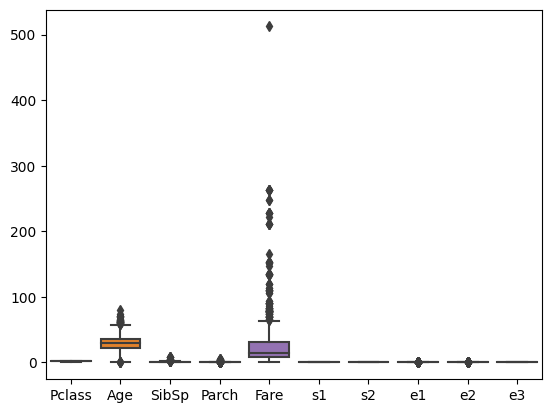

In [338]:
sns.boxplot(data=X_train1)

In [339]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train1)

<Axes: >

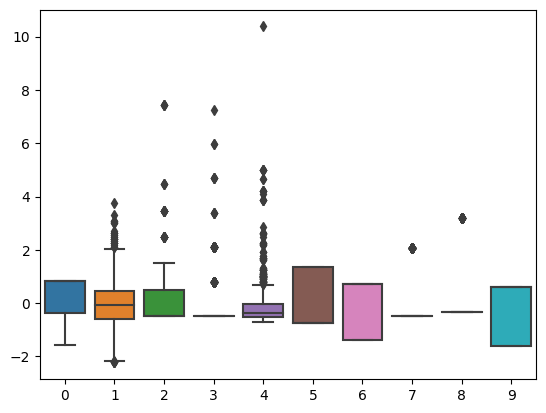

In [340]:
sns.boxplot(data=X_train)

<Axes: >

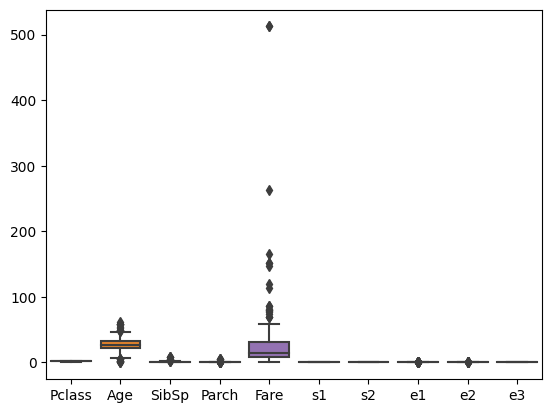

In [341]:
sns.boxplot(data=X_test)

In [342]:
X_test = ss.transform(X_test)

<Axes: >

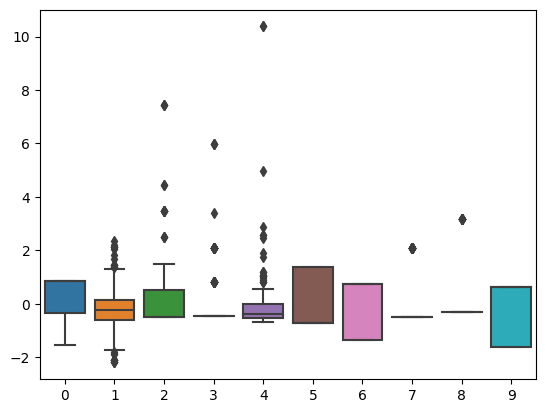

In [343]:
sns.boxplot(data=X_test)